In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Wczytywanie danych

In [2]:
dfFullData = pd.read_csv("wine.data", header=None)
dfFullData.columns = [ "Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocynains","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
dfClasses = dfFullData.pop("Class")
dfFullData

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocynains  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280/OD315 of diluted wines  Proline  
0                            3.92     1065  
1                            3.40     1050  
2                            3.17     1185  
3                            3.45     1480  
4                            2.93      735  
..                            ...      ...  
173                          1.74      740  
174                          1.56      750  
175                          1.56      835  
176                          1.62      840  
177                          1.60      560  

[178 rows x 13 columns]

## Skalowanie danych

In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(dfFullData)

## Test metody PCA

In [4]:
pca = PCA(n_components=13)
pca.fit(X,dfClasses)
sdev = np.sqrt(pca.explained_variance_)

N = []
sum = []
for i in range(len(sdev)):
    n=i+1
    N.append(n)
    sum.append(sdev[:n].sum())

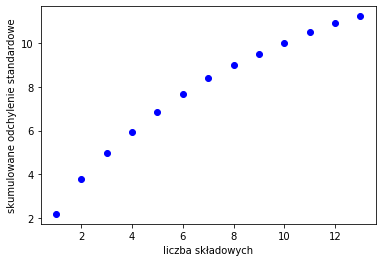

In [5]:
plt.plot(N,sum, "ob")
plt.xlabel("liczba składowych")
plt.ylabel("skumulowane odchylenie standardowe")
plt.show()

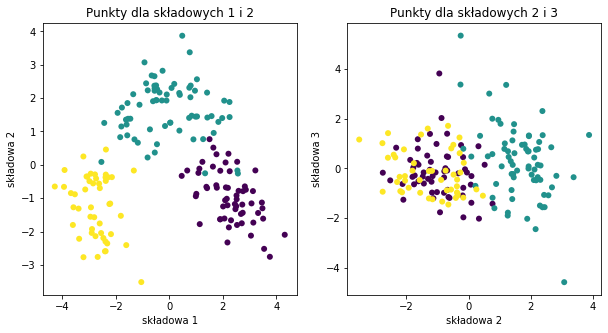

In [6]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
X_transform = pca.transform(X)
ax[0].scatter(X_transform[:,0],X_transform[:,1], c=dfClasses, edgecolor='none')

ax[0].set(xlabel="składowa 1",ylabel="składowa 2",title="Punkty dla składowych 1 i 2")

ax[1].scatter(X_transform[:,1],X_transform[:,2], c=dfClasses, edgecolor='none')
ax[1].set(xlabel="składowa 2",ylabel="składowa 3",title="Punkty dla składowych 2 i 3")

plt.show()